In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    # '_for_experiment_not_screened_cols_top_50_features_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    ]

In [3]:
filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'
    ]

In [4]:
cv_analytics_utils: Dict[str, CvAnalyticsUtil] = {}

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials


Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999403 | 0.000113276 | 0.999204 | 0.999704 |
| recall__class_0    | 0.999761 | 0.000184215 | 0.999304 | 1        |
| f1-score__class_0  | 0.999582 | 0.000108592 | 0.999353 | 0.999753 |
| precision__class_1 | 0.418175 | 0.310849    | 0        | 1        |
| recall__class_1    | 0.194048 | 0.148772    | 0        | 0.625    |
| f1-score__class_1  | 0.247718 | 0.167636    | 0        | 0.666667 |
| accuracy           | 0.999164 | 0.000217008 | 0.998708 | 0.999507 |
| auc                | 0.925187 | 0.0774096   | 0.730599 | 0.998342 |
+--------------------+----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


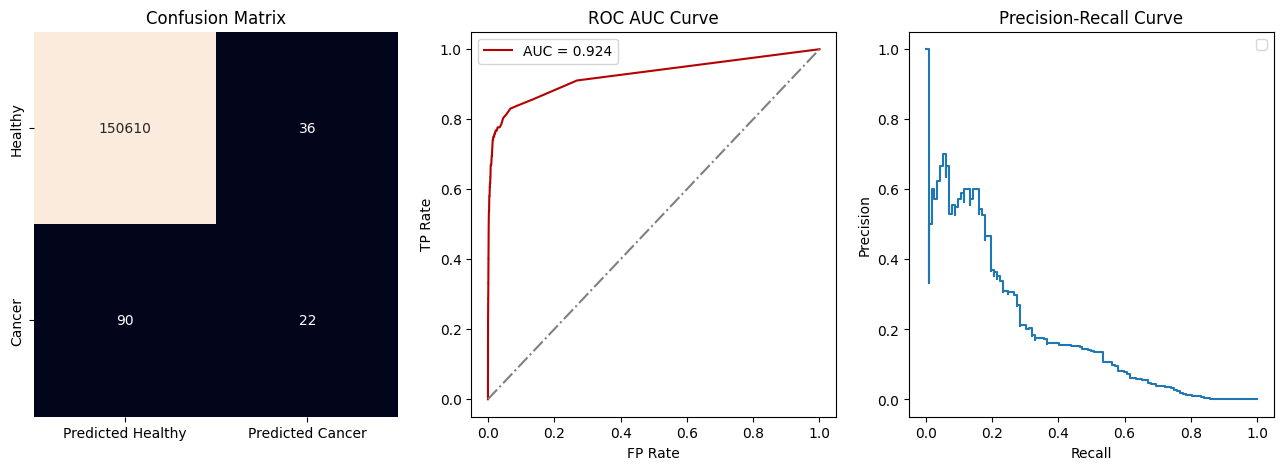

In [5]:
for filesuffix in filesuffixes:
    print(filesuffix)
    cv_analytics_util = load_cv_analytics_util_see_stats(filesuffix)
    cv_analytics_utils[filesuffix] = cv_analytics_util

X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

While for patients who developed cancer, we alligned them by the year when they got cancer. So, what I did is that I looked at the people who got cancer within the first 5 years of the experiment and who got cancer within that period. I aligned them on the year they got cancer and calculated the average estimated probability of them getting cancer as predicted by model 1 year before actually getting cancer, 2 years before actually getting cancer and so on. This is what the result I got based on the dataset with questionnaire and screening data:

There is an interesting correlation, and we can see that the increase in the probability is non-linear. (I also included the standard deviation interval). On the other hand, the graph based on the same selection of individuals, but only using the questionnaire data, did not exhibit such characteristics:

For the individuals who did not develop cancer, they were alligned by the date of their last exam. Just to verify if there is no fluke, I tested this also on a general population and there is no correlation (they are just aligned based on the last observation)

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
Threshold: 0.013333333333333334


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999853  | 0.000124908 | 0.999579   | 1         |
| recall__class_0    | 0.945489  | 0.00256314  | 0.940989   | 0.949121  |
| f1-score__class_0  | 0.97191   | 0.00135033  | 0.969548   | 0.973844  |
| precision__class_1 | 0.010949  | 0.00227212  | 0.00680272 | 0.0134875 |
| recall__class_1    | 0.811905  | 0.161261    | 0.5        | 1         |
| f1-score__class_1  | 0.0216048 | 0.00447566  | 0.0134454  | 0.0265655 |
| accuracy           | 0.94539   | 0.00255215  | 0.940937   | 0.949057  |
| auc                | 0.925148  | 0.0774316   | 0.730414   | 0.99

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


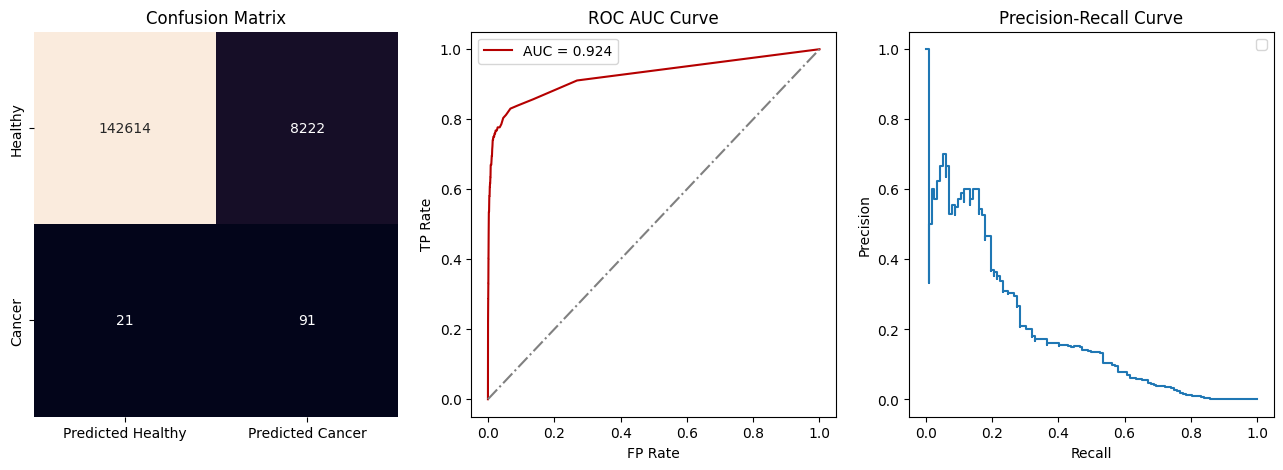

+---------------------------+---------+-----------+------------+-------+--------+------------+------------+------------+
|                           |   count |      mean |        std |   min |    25% |        50% |        75% |        max |
|---------------------------+---------+-----------+------------+-------+--------+------------+------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00125   | 0.00172516 |     0 | 0      | 0          | 0.00333333 | 0.00333333 |
| cancer_in_next_1_years_-5 |      20 | 0.008     | 0.0282097  |     0 | 0      | 0          | 0.00333333 | 0.126667   |
| cancer_in_next_1_years_-4 |      36 | 0.0140741 | 0.0419608  |     0 | 0      | 0          | 0.00333333 | 0.193333   |
| cancer_in_next_1_years_-3 |      51 | 0.010915  | 0.030522   |     0 | 0      | 0          | 0.005      | 0.166667   |
| cancer_in_next_1_years_-2 |      75 | 0.0280444 | 0.0779699  |     0 | 0      | 0.00333333 | 0.01       | 0.406667   |
| cancer_in_next_1_years_-1 |   

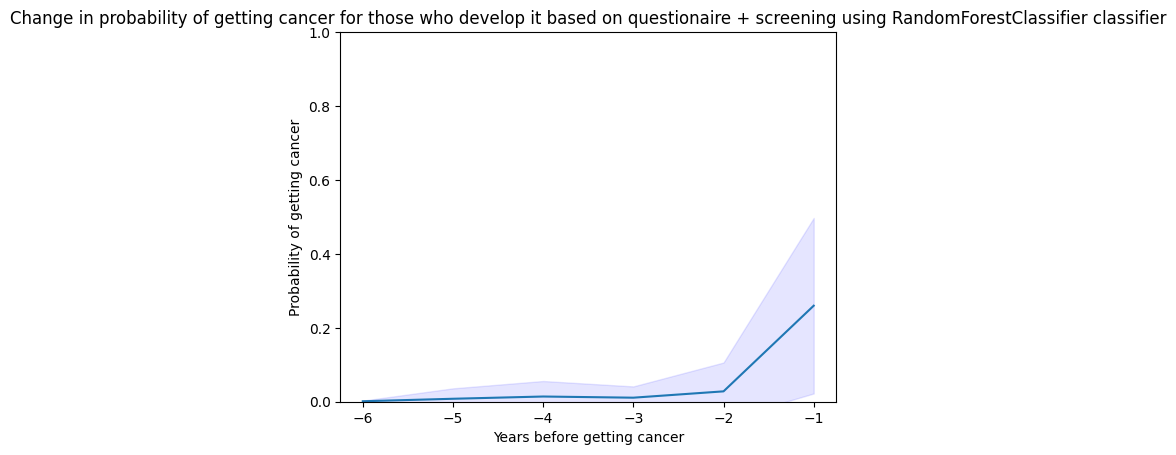

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00388006 | 0.017566  |     0 |     0 |     0 | 0.00333333 | 0.61     |
| cancer_in_next_1_years_-5 |   22319 | 0.00382992 | 0.017221  |     0 |     0 |     0 | 0.00333333 | 0.576667 |
| cancer_in_next_1_years_-4 |   25070 | 0.00386491 | 0.01697   |     0 |     0 |     0 | 0.00333333 | 0.663333 |
| cancer_in_next_1_years_-3 |   26219 | 0.00452306 | 0.0200535 |     0 |     0 |     0 | 0.00333333 | 0.523333 |
| cancer_in_next_1_years_-2 |   24683 | 0.0037852  | 0.0196935 |     0 |     0 |     0 | 0          | 0.693333 |
| cancer_in_next_1_years_-1 |   30552 | 0.00647159 | 0.0326428 |     0 |     0 |     0 | 0.00333

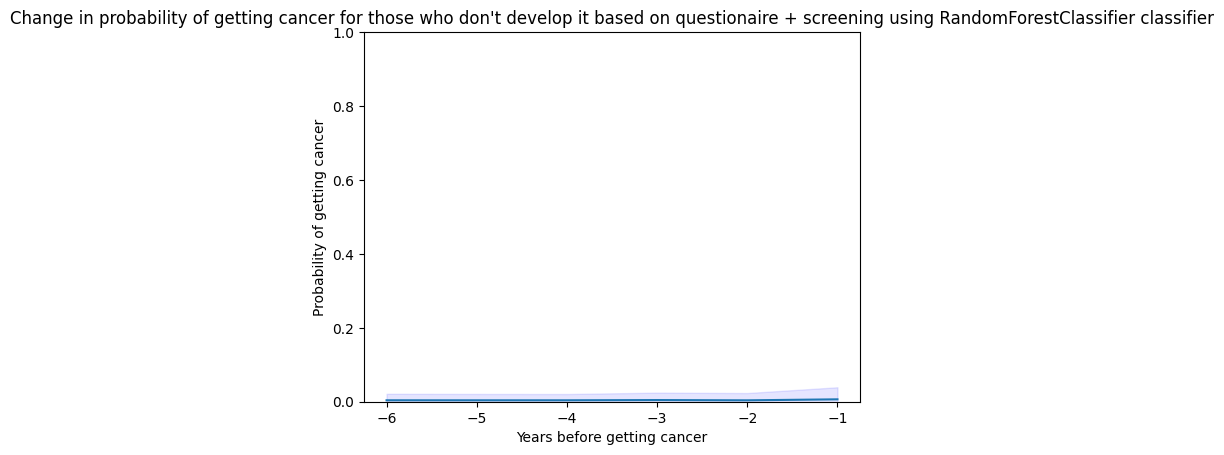

In [6]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    print(filesuffix)
    label = cv_analytics_util.get_label()
    classifier_name = cv_analytics_util.get_classifier_type()
    based_on = 'questionaire'
    if 'screened' in filesuffix:
        based_on += ' + screening'
    
    if 'single' in filesuffix:
        cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = label))
    # Plot
    threshold = cv_analytics_util.get_optimal_operating_point()
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    # End Plot
    full_dataset = cv_analytics_util.get_dataset_with_predictions()
    full_dataset_cancer = extract_full_dataset_filter_cancer(full_dataset)
    full_dataset_no_cancer = extract_full_dataset_filter_no_cancer(full_dataset)

    title_caner = f'Change in probability of getting cancer for those who develop it based on {based_on} using {classifier_name} classifier'
    title_no_caner = f'Change in probability of getting cancer for those who don\'t develop it based on {based_on} using {classifier_name} classifier'

    plot_change_in_confidence(full_dataset_cancer, title=title_caner)
    plt.show()
    plot_change_in_confidence(full_dataset_no_cancer, title=title_no_caner)
    plt.show()

In [7]:
cv_analytics_util = cv_analytics_utils['_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials']

In [8]:
full_dataset = cv_analytics_util.get_dataset_with_predictions()

threshold = 0.2
idx = full_dataset[(full_dataset['cancer_in_next_1_years_prob'] >= threshold) & (full_dataset['ovar_cancer'] == 0)]['plco_id'].unique()
full_dataset = full_dataset[full_dataset['plco_id'].isin(idx)]
full_dataset = full_dataset[full_dataset['study_yr'] >= 0]
full_dataset = full_dataset[full_dataset['ovar_observe_year'] <= 5]
dict_years_pred = {}
 
for plco_id in full_dataset['plco_id'].unique():
    # TODO: i can change min and max
    dict_years_pred[plco_id] = full_dataset[(full_dataset['plco_id'] == plco_id) & (full_dataset['cancer_in_next_1_years_prob'] >= threshold)]['ovar_observe_year'].min()
    full_dataset = full_dataset[((full_dataset['plco_id'] == plco_id) & (full_dataset['ovar_observe_year'] <= dict_years_pred[plco_id])) | (full_dataset['plco_id'] != plco_id)]

+---------------------------+---------+-----------+-----------+-------+-------------+------------+-----------+-----------+
|                           |   count |      mean |       std |   min |         25% |        50% |       75% |       max |
|---------------------------+---------+-----------+-----------+-------+-------------+------------+-----------+-----------|
| cancer_in_next_1_years_-6 |       9 | 0.0203704 | 0.0216951 |   0   | 0           | 0.02       | 0.03      | 0.0633333 |
| cancer_in_next_1_years_-5 |      16 | 0.0325    | 0.0552771 |   0   | 0           | 0.01       | 0.0266667 | 0.18      |
| cancer_in_next_1_years_-4 |      50 | 0.0406    | 0.055979  |   0   | 0.000833333 | 0.0133333  | 0.0466667 | 0.186667  |
| cancer_in_next_1_years_-3 |      89 | 0.0313858 | 0.0446869 |   0   | 0           | 0.00666667 | 0.0466667 | 0.163333  |
| cancer_in_next_1_years_-2 |     141 | 0.0489362 | 0.0608698 |   0   | 0.00333333  | 0.0233333  | 0.0666667 | 0.196667  |
| cancer_in_next

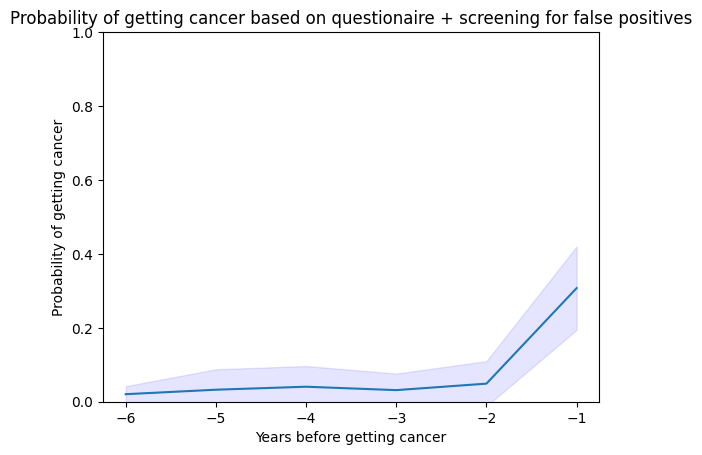

In [9]:
# full_dataset = full_dataset[full_dataset['cancer_in_next_1_years_prob'] >= threshold]
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening for false positives')